### Implement decision tree
Use decision tree to solve the Balance Scale Weight & Distance Database problem.<br>
Following the example from: <br>
https://www.geeksforgeeks.org/decision-tree-implementation-python/ <br>
Link to the dataset: <br>
https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#### Data preparation

In [2]:
# Download and loda data
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data',
sep= ',', header = None)

# Printing the dataset shape
print ("Dataset Length: ", len(balance_data))
print ("Dataset Shape: ", balance_data.shape)

# Printing the dataset obseravtions
print ("Dataset: ",balance_data.head())

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


In [4]:
# train-test split
# Separating the target variable
X = balance_data.values[:, 1:5]
Y = balance_data.values[:, 0]
  
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)

#### Train model

There are two algorithms to train the model (choose features for the nodes):
- Gini impurity
- Information gain (entropy based)

We will perform both of them.

In [5]:
# Function to perform training with Gini index (impurity)
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [6]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [7]:
# train model using gini index
clf_gini = train_using_gini(X_train, X_test, y_train)
# train model using information gain
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

[Text(0.5, 0.875, 'X[2] <= 2.5\ngini = 0.572\nsamples = 437\nvalue = [36, 203, 198]'),
 Text(0.25, 0.625, 'X[1] <= 1.5\ngini = 0.446\nsamples = 165\nvalue = [13, 117, 35]'),
 Text(0.125, 0.375, 'X[3] <= 2.5\ngini = 0.532\nsamples = 27\nvalue = [4, 6, 17]'),
 Text(0.0625, 0.125, 'gini = 0.653\nsamples = 12\nvalue = [4, 5, 3]'),
 Text(0.1875, 0.125, 'gini = 0.124\nsamples = 15\nvalue = [0, 1, 14]'),
 Text(0.375, 0.375, 'X[0] <= 1.5\ngini = 0.332\nsamples = 138\nvalue = [9, 111, 18]'),
 Text(0.3125, 0.125, 'gini = 0.637\nsamples = 25\nvalue = [5, 9, 11]'),
 Text(0.4375, 0.125, 'gini = 0.18\nsamples = 113\nvalue = [4, 102, 7]'),
 Text(0.75, 0.625, 'X[3] <= 2.5\ngini = 0.534\nsamples = 272\nvalue = [23, 86, 163]'),
 Text(0.625, 0.375, 'X[0] <= 1.5\ngini = 0.559\nsamples = 110\nvalue = [11, 62, 37]'),
 Text(0.5625, 0.125, 'gini = 0.37\nsamples = 27\nvalue = [3, 3, 21]'),
 Text(0.6875, 0.125, 'gini = 0.448\nsamples = 83\nvalue = [8, 59, 16]'),
 Text(0.875, 0.375, 'X[0] <= 3.5\ngini = 0.368\ns

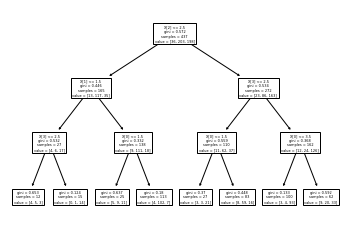

In [13]:
# plot decision tree using gini index
sklearn.tree.plot_tree(clf_gini)

[Text(0.5, 0.875, 'X[2] <= 2.5\nentropy = 1.328\nsamples = 437\nvalue = [36, 203, 198]'),
 Text(0.25, 0.625, 'X[0] <= 2.5\nentropy = 1.115\nsamples = 165\nvalue = [13, 117, 35]'),
 Text(0.125, 0.375, 'X[1] <= 2.5\nentropy = 1.505\nsamples = 64\nvalue = [12, 28, 24]'),
 Text(0.0625, 0.125, 'entropy = 1.214\nsamples = 23\nvalue = [6, 2, 15]'),
 Text(0.1875, 0.125, 'entropy = 1.303\nsamples = 41\nvalue = [6, 26, 9]'),
 Text(0.375, 0.375, 'X[1] <= 1.5\nentropy = 0.575\nsamples = 101\nvalue = [1, 89, 11]'),
 Text(0.3125, 0.125, 'entropy = 1.296\nsamples = 14\nvalue = [1, 6, 7]'),
 Text(0.4375, 0.125, 'entropy = 0.269\nsamples = 87\nvalue = [0, 83, 4]'),
 Text(0.75, 0.625, 'X[3] <= 2.5\nentropy = 1.269\nsamples = 272\nvalue = [23, 86, 163]'),
 Text(0.625, 0.375, 'X[0] <= 1.5\nentropy = 1.327\nsamples = 110\nvalue = [11, 62, 37]'),
 Text(0.5625, 0.125, 'entropy = 0.986\nsamples = 27\nvalue = [3, 3, 21]'),
 Text(0.6875, 0.125, 'entropy = 1.133\nsamples = 83\nvalue = [8, 59, 16]'),
 Text(0.875,

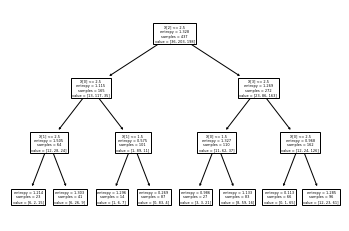

In [14]:
# plot decision tree using information gain
sklearn.tree.plot_tree(clf_entropy)

#### Model evaluation

In [8]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [9]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
    confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [10]:
print("Results Using Gini Index:")
# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]
Accuracy :  73.40425531914893
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.

/home/yangliu/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yangliu/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yangliu/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
Accuracy :  70.74468085106383
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00 

/home/yangliu/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yangliu/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yangliu/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
